# CORRELATION NOTEBOOK

#### Josh Gen (jdg9vr@virginia.edu) DS 5001 Spring 2023

In [7]:
import pandas as pd
import numpy as np

In [9]:
PAIRS = pd.read_csv('./data/PAIRS.csv', index_col=['doc_a', 'doc_b'])
CORR_MATRIX = pd.read_csv('./data/CORR_MATRIX.csv', index_col='company_id')
TOKENS = pd.read_csv('./data/TOKENS.csv', index_col=['company_id', 'link_num', 'sent_num', 'token_num'])

# Explore Correlations

In [5]:
max_corr = CORR_MATRIX.max(axis=0)
max_corr_idx = CORR_MATRIX.idxmax(axis=0)

In [6]:
corr_pairs = pd.concat([max_corr_idx, max_corr], axis=1).rename(columns={0:'Max_id', 1:'Max_correlation'})
corr_pairs

,Max_id,Max_correlation
3,10,0.225871
10,730,0.281390
33,443,0.269674
34,10,0.271149
49,704,0.197382
...,...,...
1191,896,0.206361
1200,503,0.177177
1201,414,0.231855
1216,1142,0.241941


# Creating visualizations

In [12]:
CORR = TOKENS[['term_str']].reset_index()
CORR

,company_id,link_num,sent_num,token_num,term_str
0,3,0,0,5,technology
1,3,0,0,8,designs
2,3,0,0,16,tolerance
3,3,0,0,18,size
4,3,0,0,22,tool
...,...,...,...,...,...
76662,1222,2,4,0,success
76663,1222,2,5,1,message
76664,1222,2,6,3,pentacast
76665,1222,2,6,4,inc


In [28]:
CORR['centile'] = (CORR.index * 100 / len(CORR)).astype('int') + 1

M = CORR.groupby(['centile','term_str']).term_str.count().unstack(fill_value=0)
M_SUMS = M.sum(axis=0)

In [54]:
M

term_str,a,aacco,aact,aashto,ab,abandonments,abb,abbotsford,abel,abilities,...,équipements,ï,čˢ,ġ,ǀ,ǚ,ǟٽ,δ,ӌ,ӕހi
centile,,,,,,,,,,,,,,,,,,,,,
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
M.to_csv('./visualization_data/M.csv') # index=centile

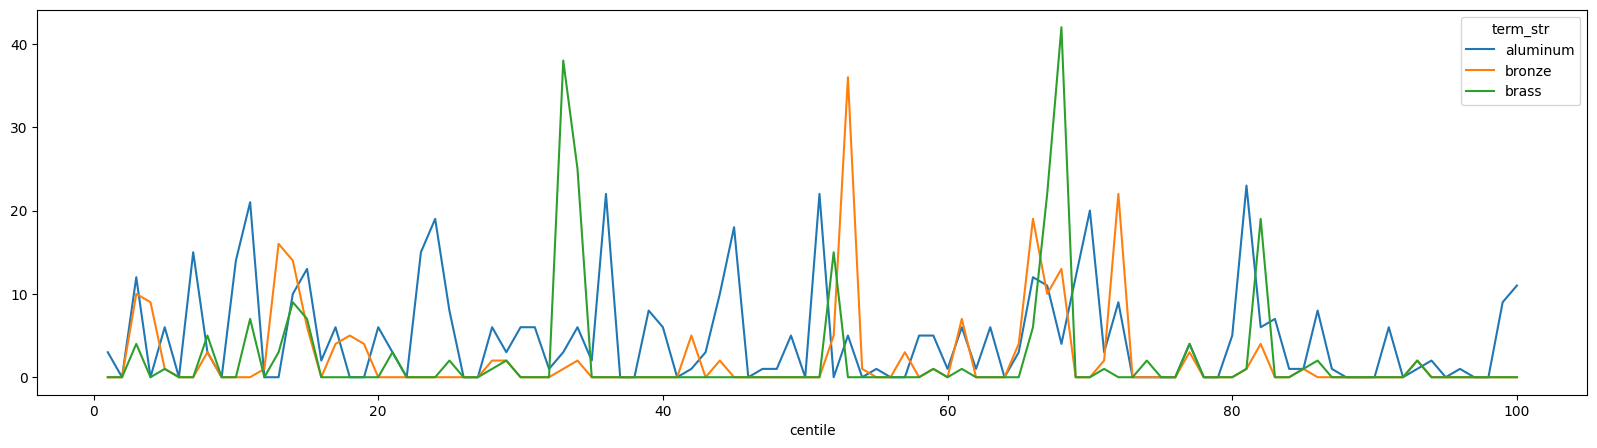

In [53]:
M[['aluminum', 'bronze', 'brass']].plot(figsize=(20,5), style='-');

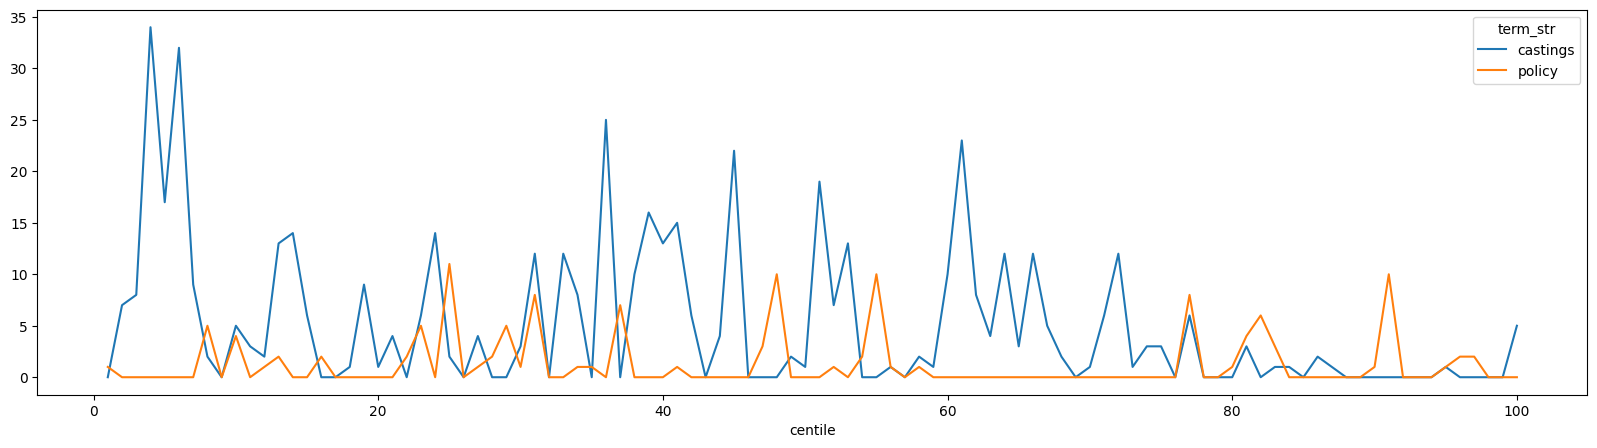

In [45]:
M[['castings', 'policy']].plot(figsize=(20,5), style='-');

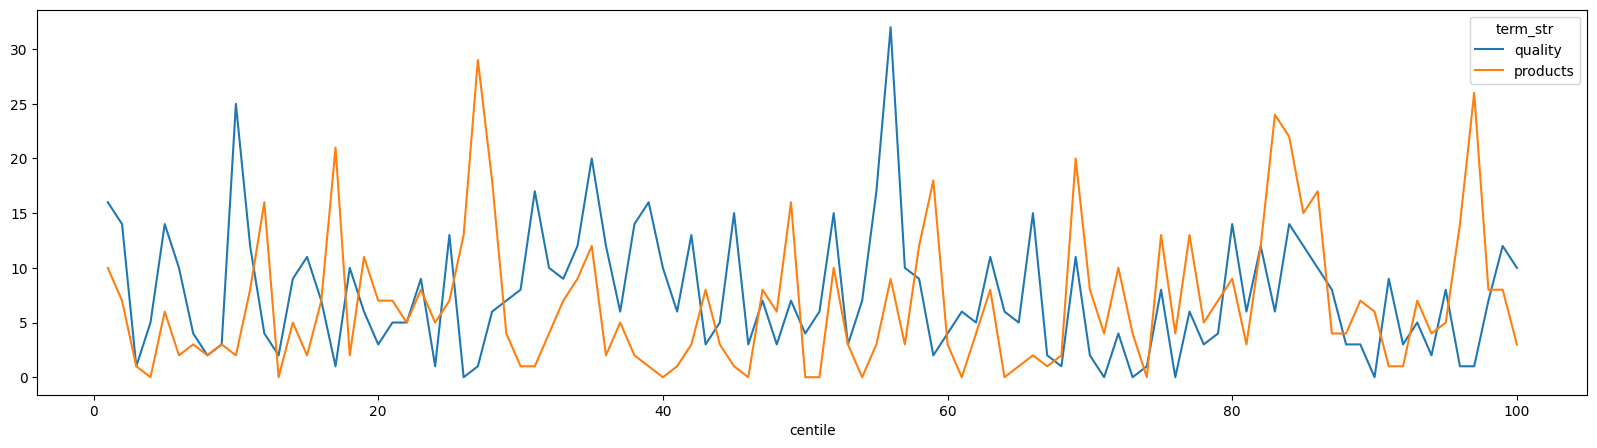

In [50]:
M[['quality', 'products']].plot(figsize=(20,5), style='-');

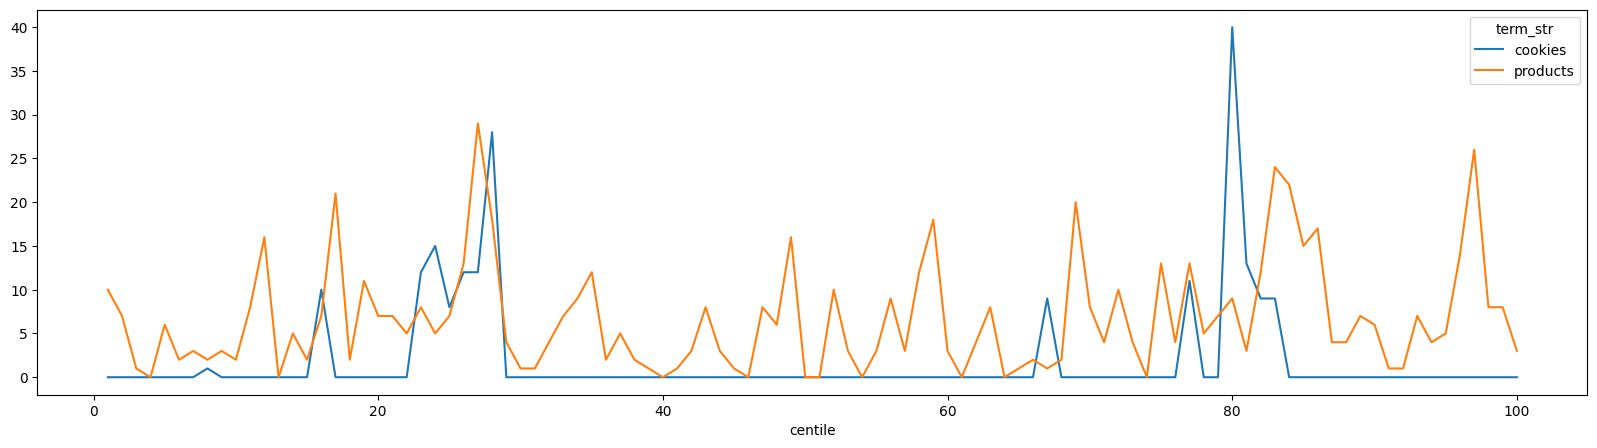

In [51]:
M[['cookies', 'products']].plot(figsize=(20,5), style='-');

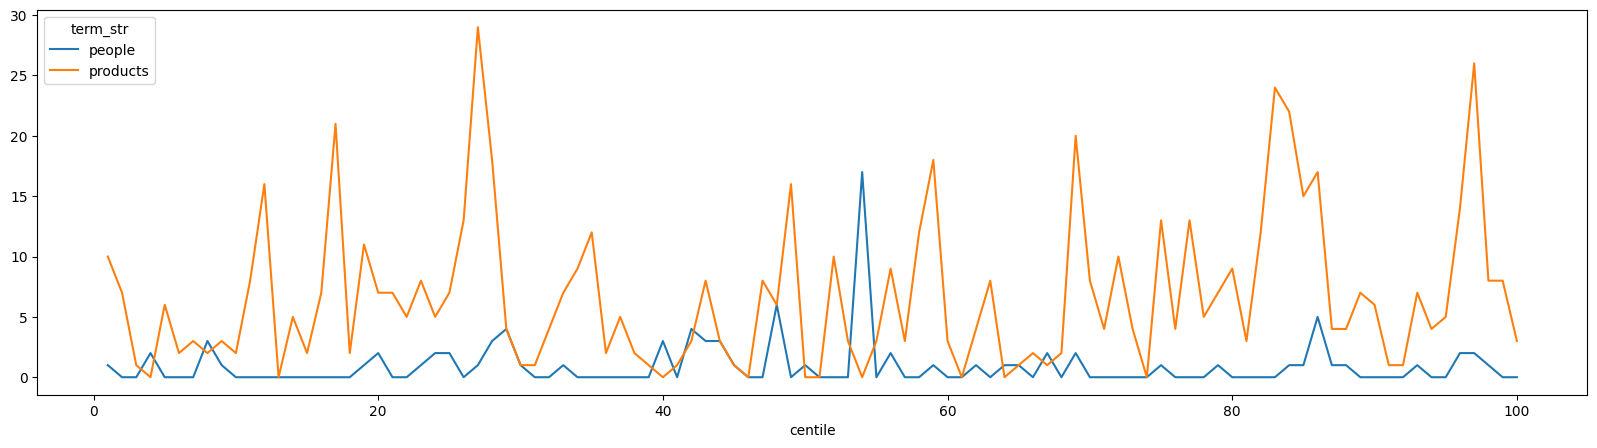

In [52]:
M[['people', 'products']].plot(figsize=(20,5), style='-');

In [25]:
M['castings'].sum()

510

In [33]:
M_SUMS[M_SUMS>500]

term_str
casting     721
castings    510
products    668
quality     747
dtype: int64

In [35]:
M_SUMS[M_SUMS>300]

term_str
alloys           349
aluminum         476
casting          721
castings         510
com              399
company          377
contact          449
customers        373
design           372
die              341
industries       312
industry         373
information      373
manufacturing    346
metal            368
parts            313
process          346
product          418
products         668
quality          747
service          328
services         419
us               320
years            319
dtype: int64

In [49]:
M_SUMS[M_SUMS>100]

term_str
address      176
aerospace    181
alloy        163
alloys       349
aluminum     476
            ... 
work         151
world        149
years        319
zinc         206
â            136
Length: 110, dtype: int64